In [65]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import datasets


In [66]:
# Veri setinin yüklenmesi
iris_dataset = sns.load_dataset('iris')

In [67]:
# Bağımlı ve bağımsız değişkenlerin oluşturulması
X = iris_dataset.values[:, 0:4]
Y = iris_dataset.values[:, 4]

# Veri kümesinin eğitim ve test verileri olarak ayrılması
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=7)

In [68]:
print("Veri setinin içeriği")
print(iris_dataset)

Veri setinin içeriği
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [69]:
print("Veri setinin boyutu")
print(iris_dataset.shape)


Veri setinin boyutu
(150, 5)


In [70]:
print("Veri setinin istatistiksel özeti")
print(iris_dataset.describe())


Veri setinin istatistiksel özeti
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [71]:
print("verilerin tür değişkenine göre dağılımı")
print(iris_dataset.groupby('species').size())

verilerin tür değişkenine göre dağılımı
species
setosa        50
versicolor    50
virginica     50
dtype: int64


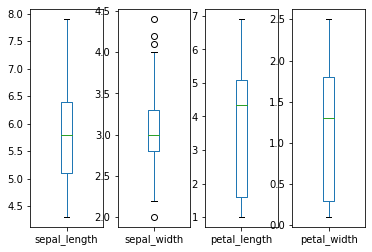

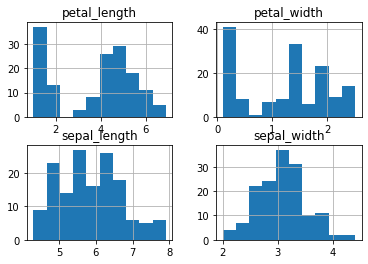

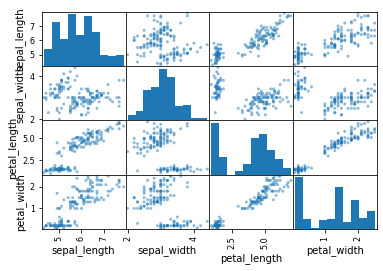

In [72]:
# kutu grafigi
iris_dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

# histogram
iris_dataset.hist()
plt.show()

# scatter plot matrix
scatter_matrix(iris_dataset)
plt.show()

In [75]:
# Modellerin listesinin olusturulmasi
models = [
    ('LR', LogisticRegressionCV(max_iter = 4000)),
    ('LDA', LinearDiscriminantAnalysis()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('NB', GaussianNB()),
    ('SVM', SVC()),
    ('MLP',MLPClassifier(max_iter = 4000))
]

In [76]:
# Modeller için 'cross validation' sonuçlarının  yazdırılması
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.975000 (0.038188)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
DT: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)
MLP: 0.983333 (0.033333)


In [63]:
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)

print('accuracy degeri :', accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

accuracy degeri : 0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30

